This notebook trains the word2vec model in the project: https://github.com/tz545/academic-thesaurus. 

In [1]:
IN_COLAB = 'google.colab' in str(get_ipython())
TRAIN = True

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    %cd /content/drive/MyDrive/Documents/HLML/AcademicThesaurus/AcademicThesaurus/

Mounted at /content/drive
/content/drive/MyDrive/Documents/HLML/AcademicThesaurus/AcademicThesaurus


In [2]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('torch.cuda.is_available():', torch.cuda.is_available())
print('Device:', device)

torch.cuda.is_available(): True
Device: cuda


In [3]:
!pip install feedparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 6.1 MB/s 
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=48c63dbd882045c2af762478c1bbd0ff99d6ebf0d8a4f88bd0b1729d08370063
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36cebfdddfe059f50e019aa
Successfully built sgmllib3k


Load the vocab and datasets created from arxiv papers containing the keyword "ecology"

In [4]:
import pickle
import os
from word2vec_cbow import Vocabulary, CBOWDataset, CBOW_Model
from train_word2vec import train_model
import torch.nn as nn

In [5]:
with open("../data_processed/ecology_vocab.pkl", 'rb') as inp:
    voc = pickle.load(inp)

with open("../data_processed/ecology_ds.pkl", 'rb') as inp:
    dataset = pickle.load(inp)

Train the model for 5 epochs

In [ ]:
train_loss, val_loss = train_model("ecology", dataset, voc, batch_size=30, epochs=5, device=device)

Total training loss:  0.246416493493787
Total validation loss:  0.24329336686784606
Total training loss:  0.2417434332965389
Total validation loss:  0.24314720359734096
Total training loss:  0.24190926930943235
Total validation loss:  0.24348660452171406
Total training loss:  0.24263884118859597
Total validation loss:  0.24398360700664865
Total training loss:  0.2433994941009002
Total validation loss:  0.24548899257383638


Visualize the training and validation loss curves

In [7]:
import matplotlib.pyplot as plt 
import numpy as np 

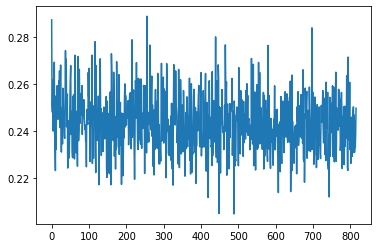

In [ ]:
plt.plot(np.arange(len(train_loss)), train_loss)

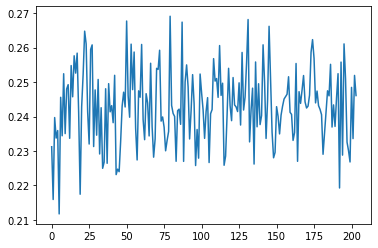

In [ ]:
plt.plot(np.arange(len(val_loss)), val_loss)

Generate some related word samples

In [7]:
from generate_related_words import academic_thesaurus

In [21]:
academic_thesaurus("ecology", "biology")

{'citizen': 0.27972543,
 'complex': 0.23790734,
 'designing': 0.22433338,
 'emergence': 0.23324907,
 'parsimonious': 0.22272396,
 'reinforcement': 0.25704685,
 'shed': 0.24830875,
 'specially': 0.24267569,
 'topic': 0.23515934,
 'understanding': 0.24592328}

In [20]:
academic_thesaurus("ecology", "niche")

{'consumer': 0.2535851,
 'dynamics': 0.22078398,
 'exclusion': 0.22313766,
 'externally': 0.21600363,
 'feeding': 0.21817698,
 'incorporated': 0.21153033,
 'mutualistic': 0.22880353,
 'nodal': 0.22041456,
 'nonlinear': 0.2237287,
 'spatial': 0.2394875}

In [19]:
academic_thesaurus("ecology", "stable")

{'clone': 0.20729634,
 'death': 0.23773187,
 'equilibrium': 0.21123397,
 'extant': 0.2163423,
 'fixed': 0.20835713,
 'mortality': 0.2159956,
 'point': 0.23897713,
 'reactive': 0.21955144,
 'state': 0.21736577,
 'stationary': 0.2264913}

In [18]:
academic_thesaurus("ecology", "understanding")

{'biology': 0.24592328,
 'citizen': 0.27528358,
 'deep': 0.24065463,
 'machine': 0.25853387,
 'mining': 0.24287,
 'organismal': 0.24227944,
 'overview': 0.228995,
 'prevention': 0.22874762,
 'successfully': 0.23458296,
 'world': 0.22821572}

In [17]:
academic_thesaurus("ecology", "abundance")

{'abundant': 0.23077786,
 'compete': 0.2553249,
 'correspond': 0.2426943,
 'discreteness': 0.2307463,
 'exceed': 0.24620304,
 'externally': 0.23376276,
 'interaction': 0.24496728,
 'mutant': 0.23437104,
 'richness': 0.23019731,
 'steady': 0.2480846}

In [16]:
academic_thesaurus("ecology", "species")

{'facilitation': 0.2561527,
 'heterogeneity': 0.24633099,
 'mutualism': 0.24003027,
 'persistence': 0.2405929,
 'pinning': 0.24738811,
 'population': 0.2814226,
 'predation': 0.26344836,
 'predator': 0.28833932,
 'synonymous': 0.24086553,
 'trophic': 0.27953577}

In [15]:
academic_thesaurus("ecology", "physics")

{'citizen': 0.29124677,
 'conceptual': 0.26149756,
 'homogenization': 0.21782689,
 'mining': 0.22496739,
 'realm': 0.2139141,
 'science': 0.22513053,
 'scrutinize': 0.22581294,
 'shaping': 0.21626179,
 'systematically': 0.21437095,
 'world': 0.26551163}

In [22]:
academic_thesaurus("ecology", "distribution")

{'affine': 0.18988766,
 'analytically': 0.18201585,
 'conditional': 0.18787557,
 'constant': 0.18119997,
 'correlation': 0.17859969,
 'eigenvalue': 0.17858759,
 'expression': 0.1949773,
 'normally': 0.18330906,
 'saturate': 0.17894572,
 'size': 0.19415145}